# Ensemble Beta + CORDEX models' error metrics:

In [1]:
version = '7'

In [2]:
# Load auxiliar functions and configurations
filename = 'utils_v{}.ipynb'.format(version)
%run $filename

In [3]:
# Configurations
print('cordex_output_path', cordex_output_path)
print('temp_output_path', temp_output_path)
print('temp_obs_col', temp_obs_col)
print('models_cols', models_cols)
print('ens_beta_col', ens_beta_col)

cordex_output_path ..\data\cordex\output
temp_output_path ..\data\observations\temp\output
temp_obs_col 17
models_cols [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
ens_beta_col 18


### Loading the data from file - JJA

In [4]:
df_all_jja = load_csv2df('cordex_join_obs_jja.csv', cordex_output_path, freq_index='3H')

In [5]:
df_all_jja.head()

0          1          2          3          4   \
date                                                                         
1979-06-01 00:00:00  13.419122  14.471643  14.328729  13.729150  13.672754   
1979-06-01 03:00:00  12.501764  14.402551  12.254663  14.001581  13.041925   
1979-06-01 06:00:00  11.911584  13.907617  11.871179  13.747766  12.438898   
1979-06-01 09:00:00  15.474115  17.524805  18.803857  15.239832  16.544214   
1979-06-01 12:00:00  17.844873  19.986719  24.058984  16.716211  21.106104   

                            5          6          7          8          9   \
date                                                                         
1979-06-01 00:00:00  10.644250  12.337183  10.969507  16.211725  19.048730   
1979-06-01 03:00:00   9.791833  11.918695  10.839319  15.977960  18.184839   
1979-06-01 06:00:00   9.561914  12.052179  10.406824  16.152734  17.723444   
1979-06-01 09:00:00  12.460474  14.724603  15.226221  22.113336  21.220728   
1979-06-01 12:00:00  13.730859  18.498956  18.569238  27.650629  25.784845   

                            10         11         12         13         14  \
date                                                                         
1979-06-01 00:00:00  14.766718  16.977441  12.107019  14.522089  15.005762   
1979-06-01 03:00:00  15.022180  16.634790  11.559991  14.790338  14.716455   
1979-06-01 06:00:00  13.791528  16.666528  11.469415  15.098444  14.315088   
1979-06-01 09:00:00  16.057153  18.326074  15.713953  17.690302  15.798486   
1979-06-01 12:00:00  17.785272  20.640039  18.421106  20.991083  21.013086   

                            15         16         17  
date                                                  
1979-06-01 00:00:00  15.043542  10.745996  12.933333  
1979-06-01 03:00:00  14.938684  11.698389  12.233333  
1979-06-01 06:00:00  15.044244  13.068018  11.933333  
1979-06-01 09:00:00  15.259332  16.350977  15.533333  
1979-06-01 12:00:00  16.919702  19.115137  18.900000

### Time series with all models' data together

In [6]:
# df only for observations, df_models
df_obs, df_models = df_all_jja[[temp_obs_col]], df_all_jja[models_cols]

df_models = df_models.stack().to_frame(name=ens_beta_col)
df_models.reset_index(level=1, drop=True, inplace=True)
df_all_jja_ens = df_models.join(df_obs, how='left')
df_all_jja_ens.head()

18         17
date                            
1979-06-01  13.419122  12.933333
1979-06-01  14.471643  12.933333
1979-06-01  14.328729  12.933333
1979-06-01  13.729150  12.933333
1979-06-01  13.672754  12.933333

In [7]:
# metric_by_hour argument lst_model_cols must be a list
df_bias, _ = metric_by_hour(bias, df_all_jja_ens, [ens_beta_col], temp_obs_col)
df_bias
#2.668284	2.563448	2.461113	0.211921	-0.617419	0.063529	1.762721	2.898572

0         3         6         9         12        15        18  \
18  2.668284  2.563448  2.461113  0.211921 -0.617419  0.063529  1.762721   

          21  
18  2.898572

In [8]:
# metric_by_hour argument lst_model_cols must be a list
df_perkins, _ = metric_by_hour(perkins_skill_score, df_all_jja_ens, [ens_beta_col], temp_obs_col)
df_perkins


# 59.178744	59.808658	60.125983	86.312399	81.976414	87.790092	78.230084	57.468978

0          3          6          9          12         15  \
18  59.178744  59.808658  60.125983  86.312399  81.976414  87.790092   

           18         21  
18  78.230084  57.468978

In [9]:
# metric_by_hour argument lst_model_cols must be a list
df_sigma, _ = metric_by_hour(sigma_score, df_all_jja_ens, [ens_beta_col], temp_obs_col)
df_sigma
# 1.036167	1.092849	1.149674	1.330717	1.413442	1.282919	1.129402	1.023767

0         3         6         9         12        15        18  \
18  1.035971  1.092642  1.149456  1.330465  1.413175  1.282676  1.129188   

          21  
18  1.023573

In [10]:
# metric_by_hour argument lst_model_cols must be a list
df_yk, _ = YK_skewness_by_hour(df_all_jja_ens, [ens_beta_col], temp_obs_col)
df_yk
# -0.11185	-0.133803	-0.131997	-0.128595	-0.079682	-0.079284	-0.049103	-0.081987

0         3         6         9         12        15        18  \
18 -0.111132 -0.133803 -0.131997 -0.128097 -0.079682 -0.078943 -0.049612   

          21  
18 -0.081671

### Sigma score - Normalized standard deviation measure

In [11]:
df_sigma_jja, _ = metric_by_hour(sigma_score, df_all_jja, models_cols, temp_obs_col)
df_sigma_jja

0         3         6         9         12        15        18  \
0   1.050750  1.087355  1.112521  1.435211  1.565933  1.441874  1.207767   
1   1.039253  1.087320  1.160489  1.180689  1.212188  1.144428  1.074712   
2   0.977166  1.031273  1.069242  1.308870  1.522615  1.426324  1.191208   
3   0.838903  0.854562  0.882253  1.118658  1.303322  1.224752  1.054334   
4   1.095157  1.134675  1.188673  1.192632  1.138203  1.090760  1.062944   
5   0.880214  0.913772  0.942832  1.184569  1.291355  1.180599  1.034312   
6   1.124459  1.180563  1.292719  1.553842  1.448871  1.286950  1.202600   
7   1.080766  1.151689  1.295819  1.656752  1.711445  1.541504  1.299678   
8   1.061846  1.128994  1.135278  1.296248  1.455373  1.293854  0.990327   
9   1.077942  1.101345  1.151618  1.209338  1.172786  1.114008  1.108821   
10  0.930397  0.957521  1.003166  1.140404  1.118367  1.055735  1.006920   
11  0.958725  0.990517  1.018827  1.297327  1.454404  1.358493  1.178461   
12  1.074817  1.113997  1.177324  1.290859  1.350631  1.245757  1.212960   
13  0.896276  0.990374  1.033623  1.211446  1.323828  1.030976  0.839974   
14  0.930571  0.967134  1.025250  1.042334  1.054822  1.003309  0.939818   
15  0.857003  0.890748  0.941533  1.007445  1.118905  1.055896  0.990967   
16  0.766007  0.829647  0.857126  1.073024  1.226469  1.097931  0.910185   

          21  
0   1.069317  
1   1.037061  
2   0.978346  
3   0.860873  
4   1.075859  
5   0.900710  
6   1.116961  
7   1.098788  
8   0.926979  
9   1.092734  
10  0.922318  
11  0.989321  
12  1.108908  
13  0.773930  
14  0.918063  
15  0.883338  
16  0.751989

### Perkins skill score

In [12]:
df_perkins_jja, _ = metric_by_hour(perkins_skill_score, df_all_jja, models_cols, temp_obs_col)
df_perkins_jja

0          3          6          9          12         15  \
0   51.288245  50.402576  51.127214  82.085346  76.811594  81.602254   
1   56.481481  56.924316  57.165862  71.457327  85.225443  80.877617   
2   44.685990  44.243156  44.444444  77.375201  77.053140  77.415459   
3   38.204509  38.486312  36.473430  82.689211  86.714976  88.929147   
4   64.613527  63.607085  62.962963  79.790660  89.412238  89.452496   
5   40.217391  39.371981  40.499195  87.721417  86.473430  91.223833   
6   59.219002  60.869565  61.835749  66.908213  68.639291  65.539452   
7   42.793881  40.619968  42.351047  66.908213  68.397746  70.450886   
8   55.072464  59.017713  62.479871  81.763285  76.570048  85.708535   
9   76.690821  78.180354  77.375201  87.681159  89.331723  89.291465   
10  74.436393  76.006441  75.201288  90.861514  91.505636  86.352657   
11  62.479871  62.560386  61.030596  84.219002  76.127214  81.602254   
12  68.156200  68.760064  67.954911  85.104670  70.571659  77.536232   
13  54.025765  57.125604  60.587762  72.020934  74.959742  94.162641   
14  71.175523  71.296296  71.175523  92.069243  91.586151  93.800322   
15  74.557166  73.631240  73.752013  76.892110  54.991948  63.727858   
16  62.882448  63.365539  66.425121  77.536232  76.368760  86.553945   

           18         21  
0   72.987118  51.006441  
1   67.793881  54.267311  
2   66.344605  43.196457  
3   70.209340  41.425121  
4   80.072464  64.694042  
5   73.349436  42.149758  
6   60.064412  52.858293  
7   63.526570  45.048309  
8   68.800322  47.906602  
9   83.333333  73.429952  
10  75.925926  66.787440  
11  83.896940  62.077295  
12  87.520129  69.565217  
13  72.866345  47.624799  
14  83.333333  69.766506  
15  86.594203  76.650564  
16  85.265700  60.628019

### Yule-Kendall skewness 

In [13]:
df_yk_jja, _ = YK_skewness_by_hour(df_all_jja, models_cols, temp_obs_col)
df_yk_jja

0         3         6         9         12        15        18  \
0  -0.092427 -0.155724 -0.207710 -0.108897 -0.070803 -0.056429 -0.021665   
1  -0.062701 -0.065944 -0.042349 -0.114120 -0.095898 -0.074238 -0.047438   
2  -0.201048 -0.249676 -0.231963 -0.130104 -0.034626 -0.047289 -0.015944   
3  -0.002910 -0.136004 -0.196592 -0.060436 -0.045831 -0.024061  0.036033   
4   0.017165  0.037137  0.040334  0.010009 -0.026683 -0.045761  0.002373   
5  -0.225203 -0.255637 -0.258049 -0.167952 -0.092828 -0.083616 -0.060610   
6  -0.238728 -0.251706 -0.260901 -0.099116  0.046699  0.027176 -0.048733   
7  -0.336504 -0.338861 -0.361370 -0.241045 -0.070222 -0.106501 -0.180507   
8   0.027299  0.034707  0.032599 -0.047465 -0.025877  0.066095  0.032334   
9   0.016250  0.001293 -0.003446  0.033211  0.001232 -0.013584  0.034759   
10 -0.021289 -0.049005 -0.070047  0.002719  0.048560  0.092270  0.093636   
11 -0.052836 -0.147688 -0.178312 -0.063305 -0.033397 -0.066097  0.014738   
12 -0.034224 -0.027272 -0.011391 -0.038368 -0.111031 -0.126189 -0.057495   
13 -0.072569 -0.051678 -0.034075 -0.056072  0.014981 -0.015517 -0.012567   
14 -0.001340  0.006975 -0.009593 -0.016353 -0.020280  0.006791  0.015570   
15 -0.035682 -0.050529 -0.036747 -0.009418 -0.053242 -0.082890 -0.000021   
16 -0.293084 -0.356205 -0.349280 -0.242846 -0.132783 -0.142329 -0.063290   

          21  
0  -0.027699  
1  -0.071401  
2  -0.099555  
3   0.046740  
4   0.016771  
5  -0.149833  
6  -0.191687  
7  -0.284473  
8   0.023450  
9   0.028073  
10  0.009142  
11  0.011980  
12 -0.030574  
13 -0.085602  
14  0.002135  
15  0.014706  
16 -0.156989

## Metrics for all seasons

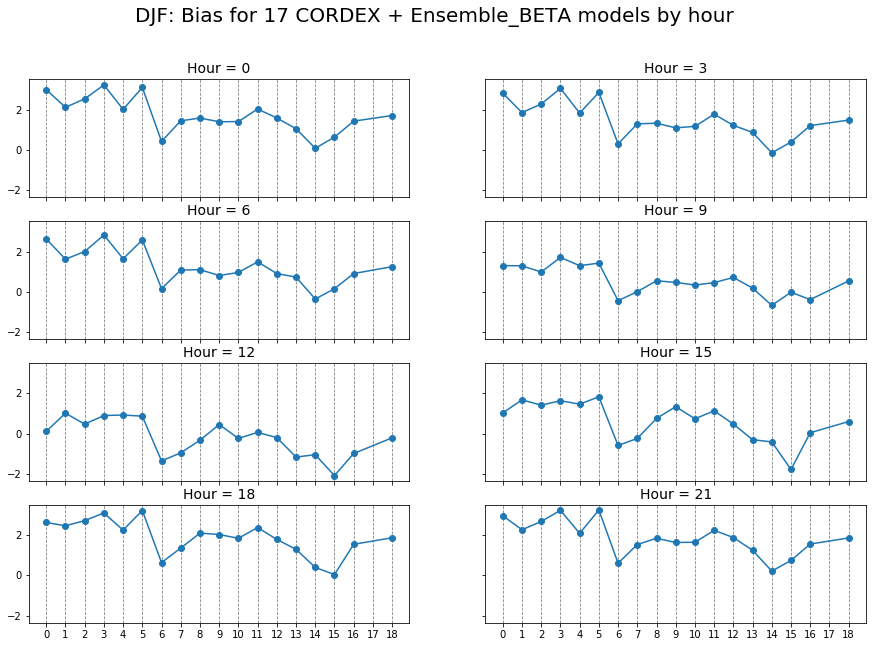

..\plots\output\metrics_ensembles


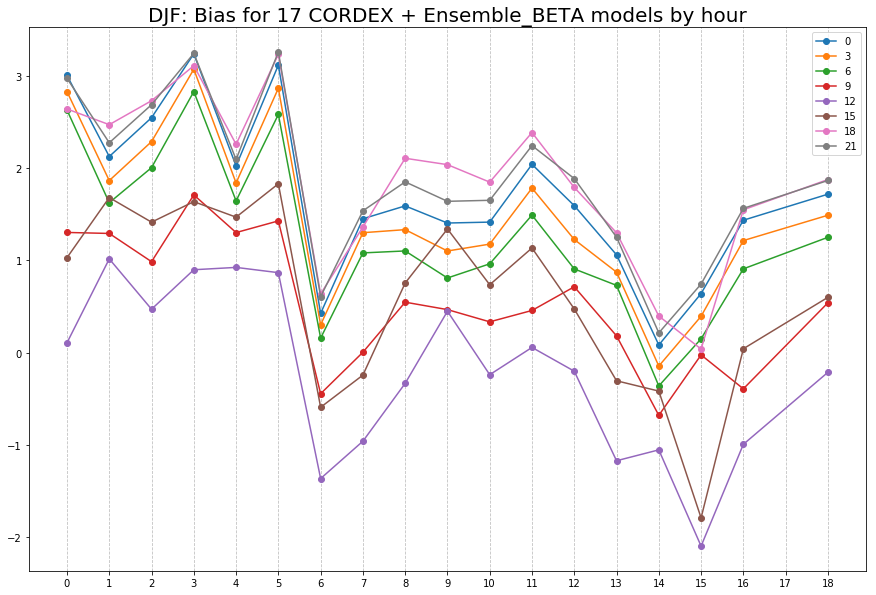

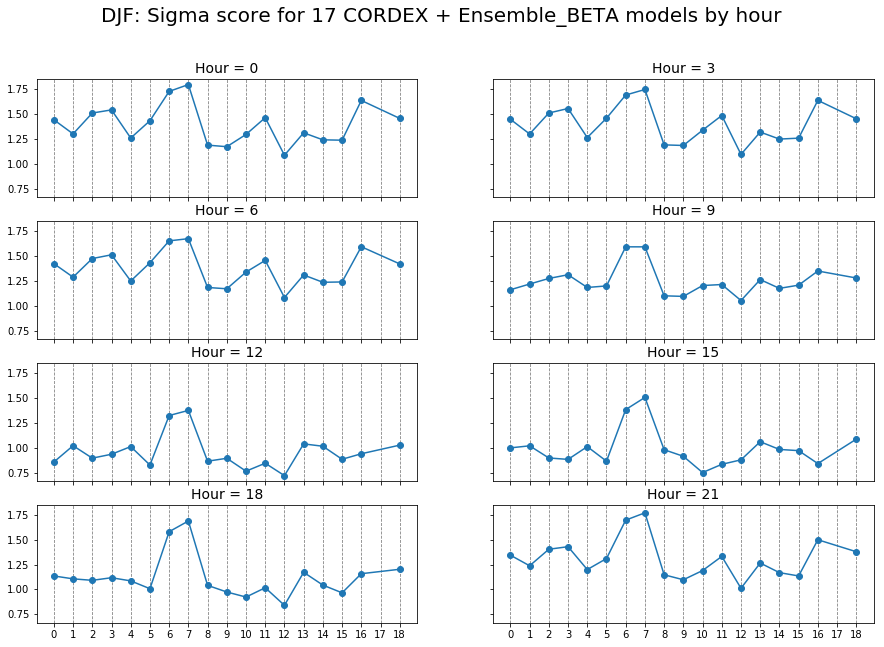

..\plots\output\metrics_ensembles


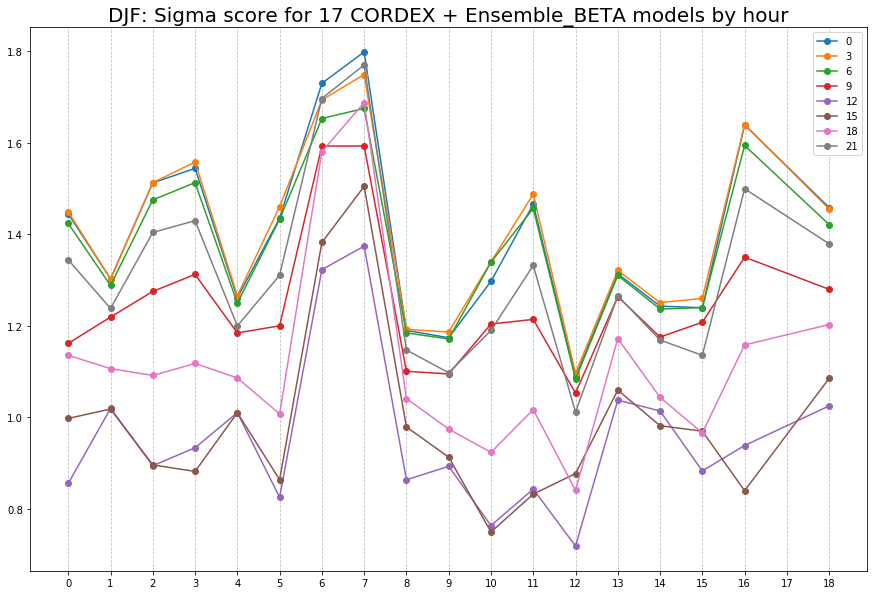

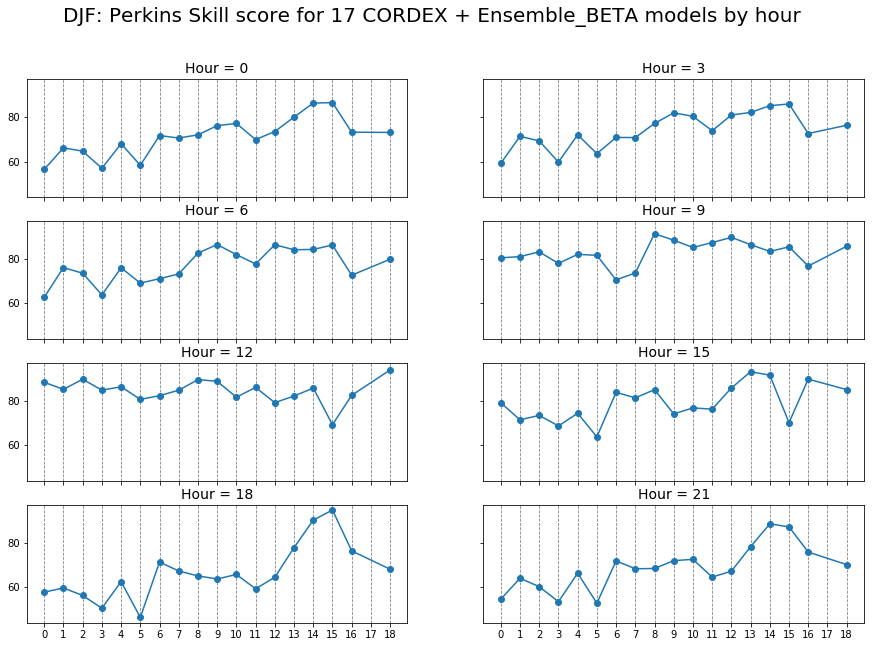

..\plots\output\metrics_ensembles


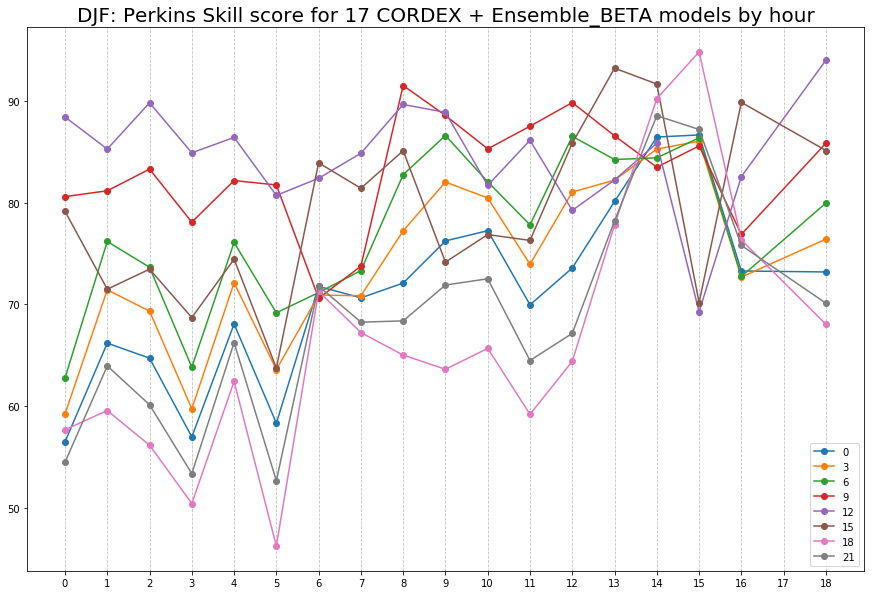

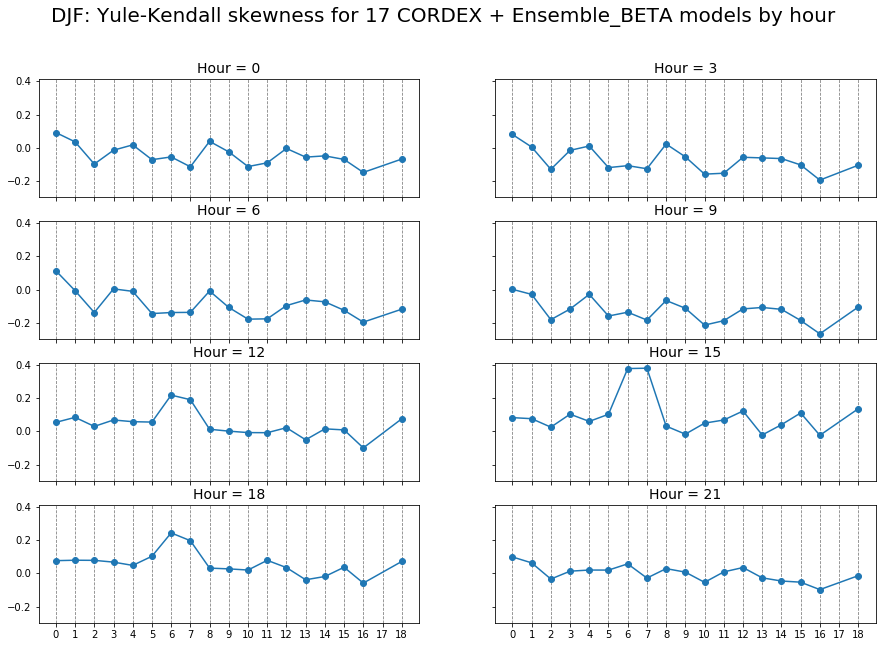

..\plots\output\metrics_ensembles


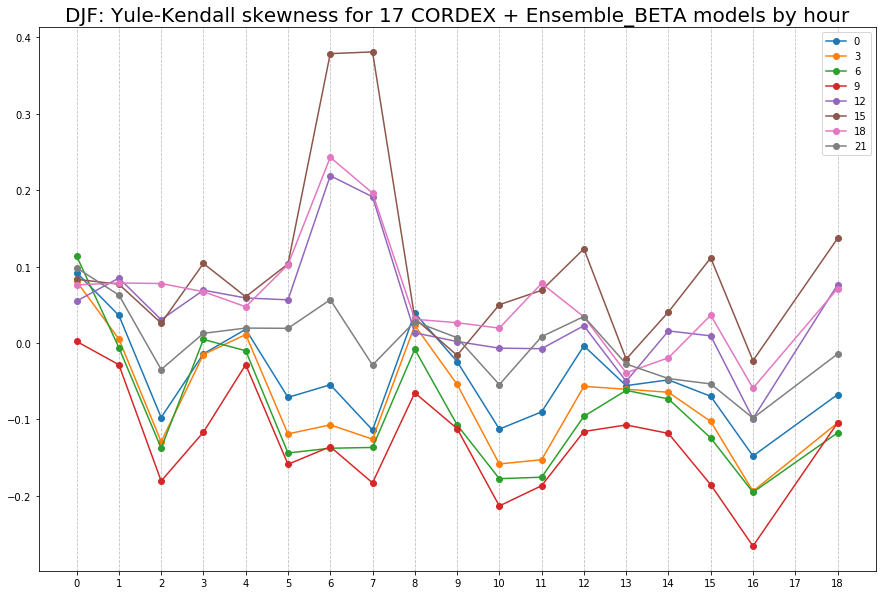

In [14]:
metrics_models_ensemblesBETA('cordex_join_obs_djf.csv', 'DJF', cordex_output_path, 'CORDEX',
                             models_cols, temp_obs_col, ens_beta_col,
                             plot=True, sub_folder='metrics_ensembles');

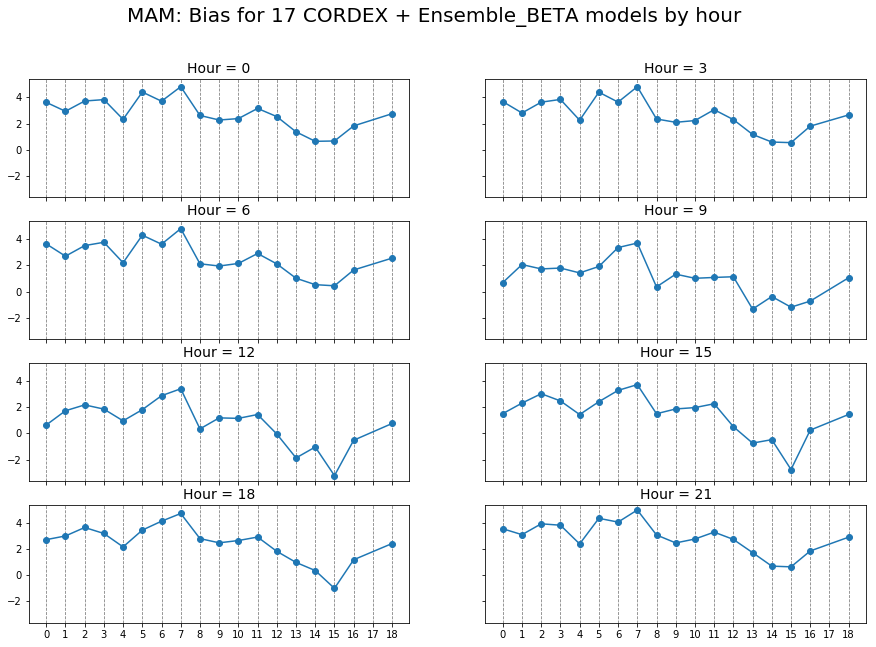

..\plots\output\metrics_ensembles


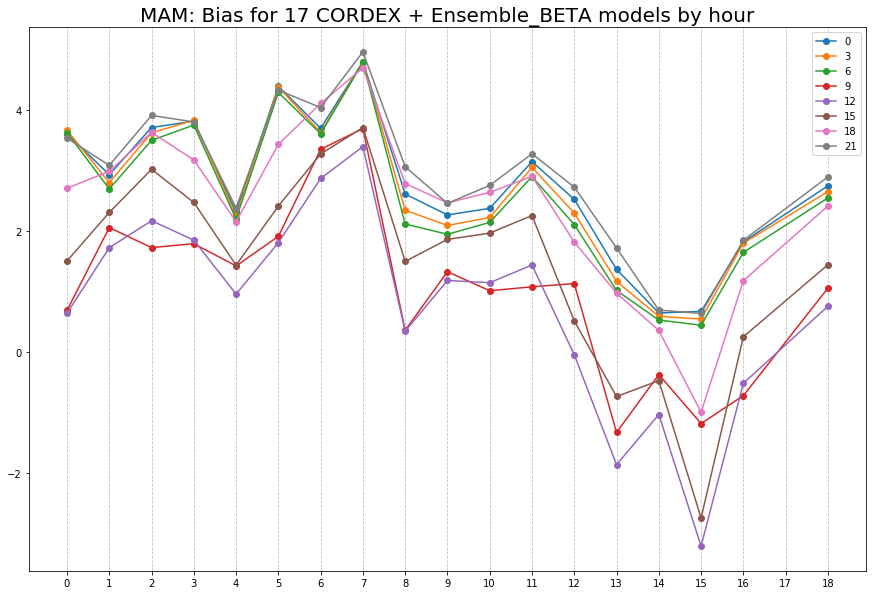

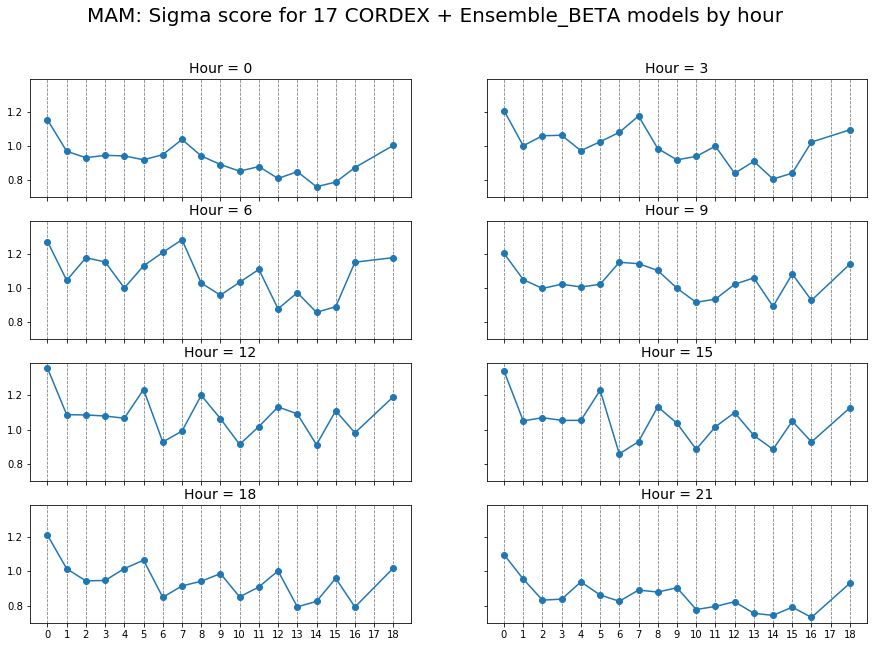

..\plots\output\metrics_ensembles


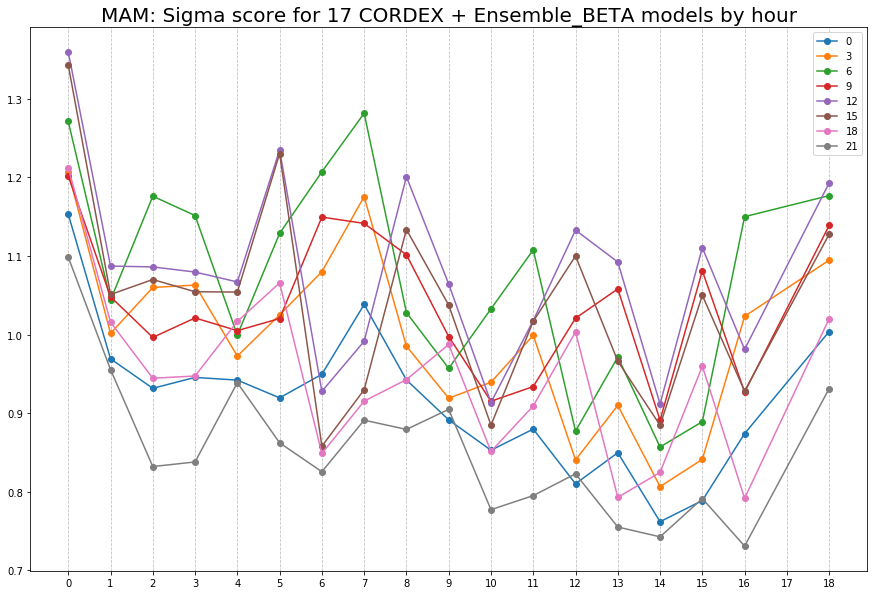

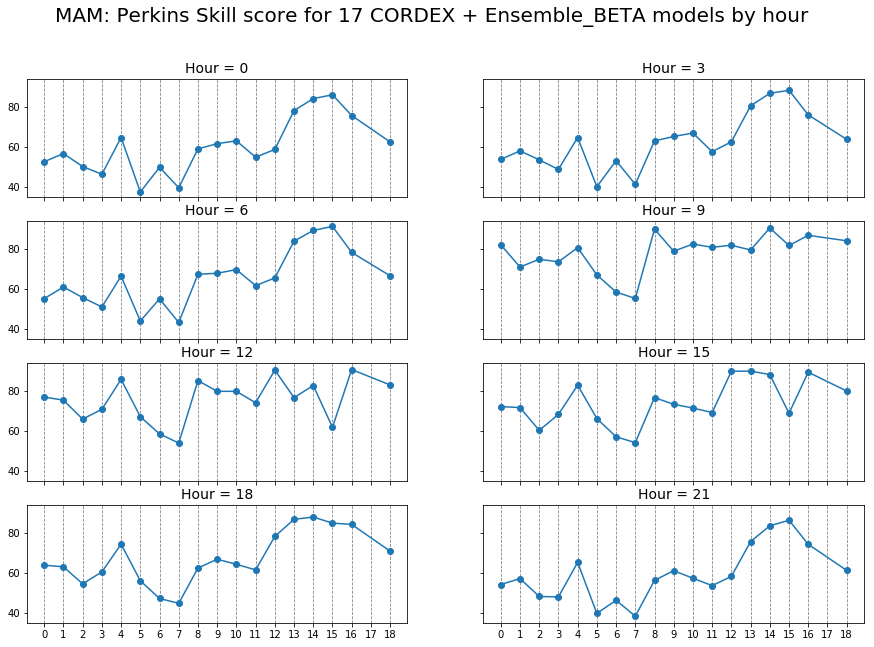

..\plots\output\metrics_ensembles


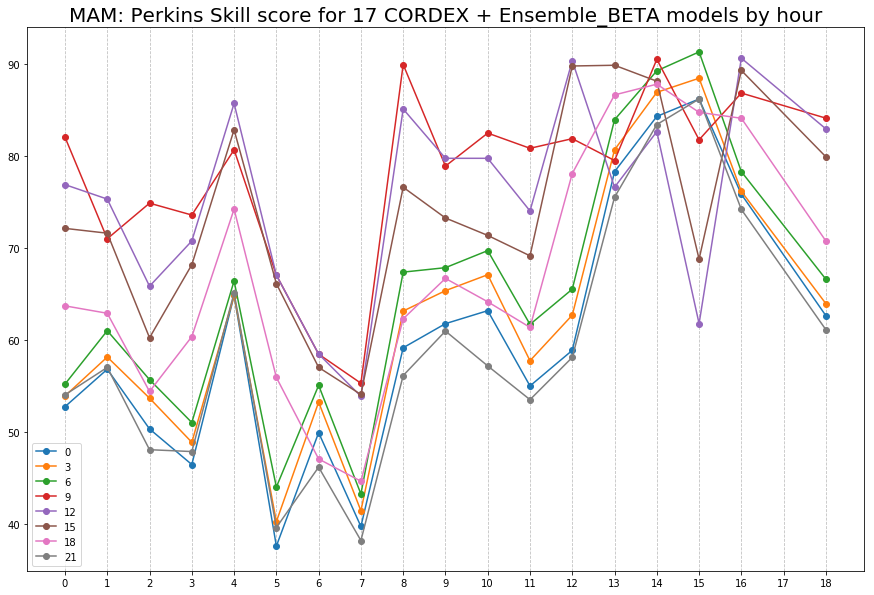

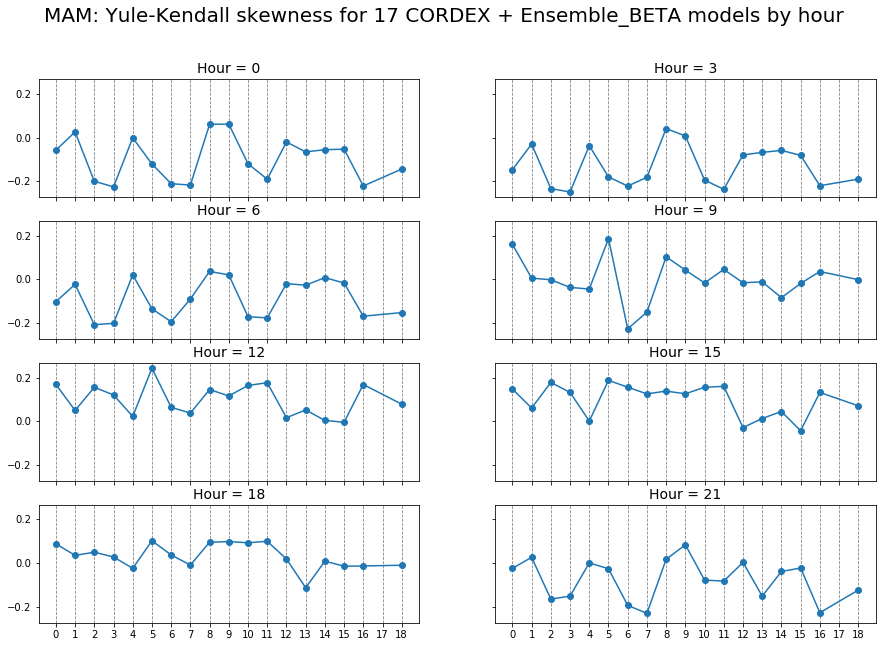

..\plots\output\metrics_ensembles


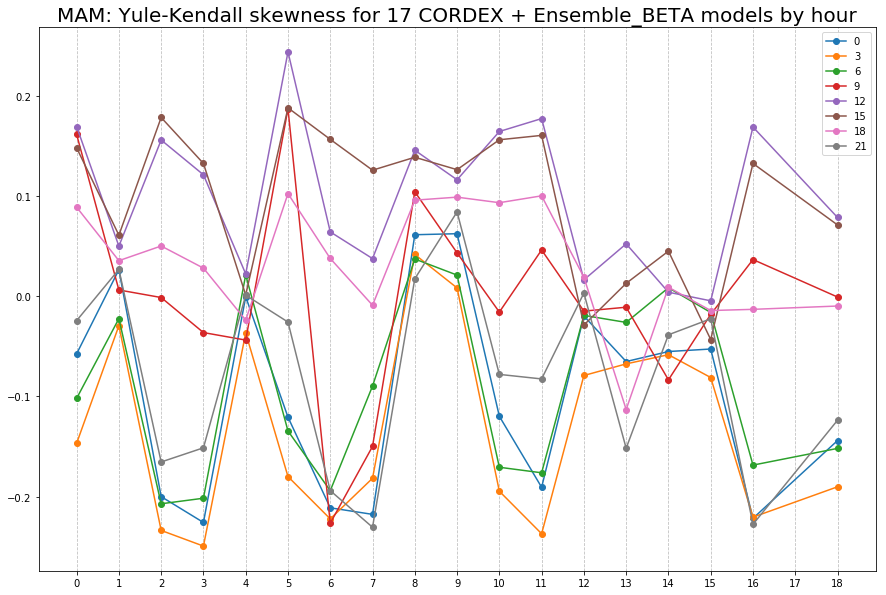

In [15]:
metrics_models_ensemblesBETA('cordex_join_obs_mam.csv', 'MAM', cordex_output_path, 'CORDEX',
                             models_cols, temp_obs_col, ens_beta_col,
                             plot=True, sub_folder='metrics_ensembles');

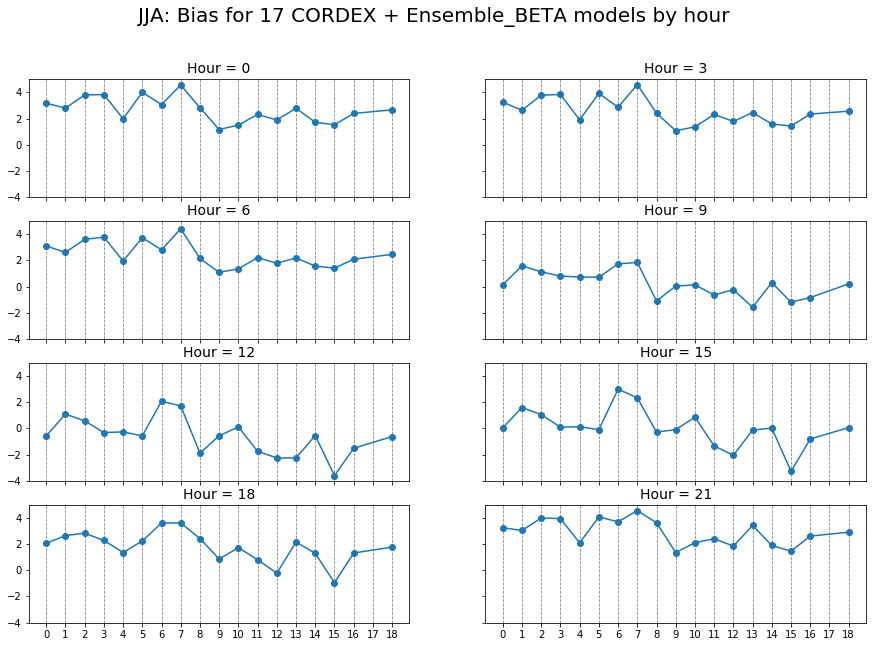

..\plots\output\metrics_ensembles


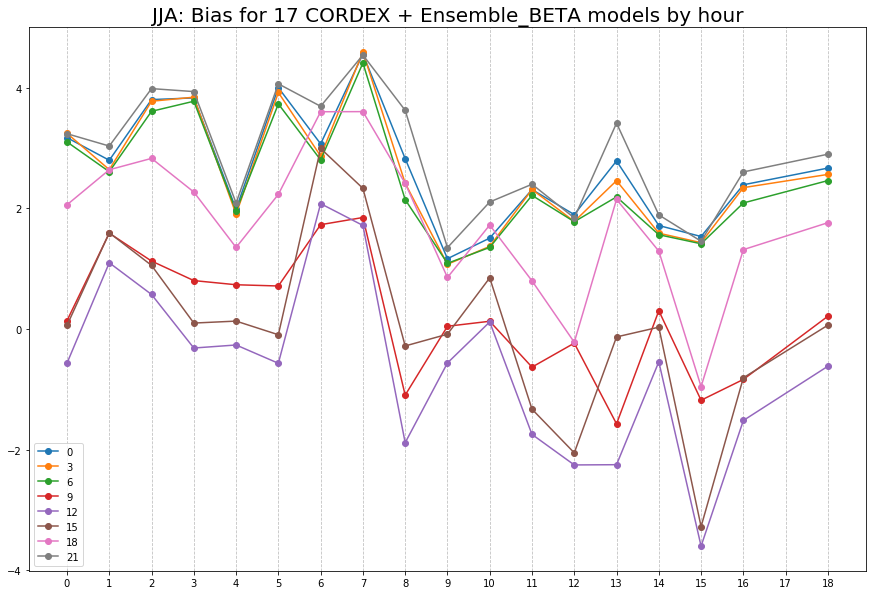

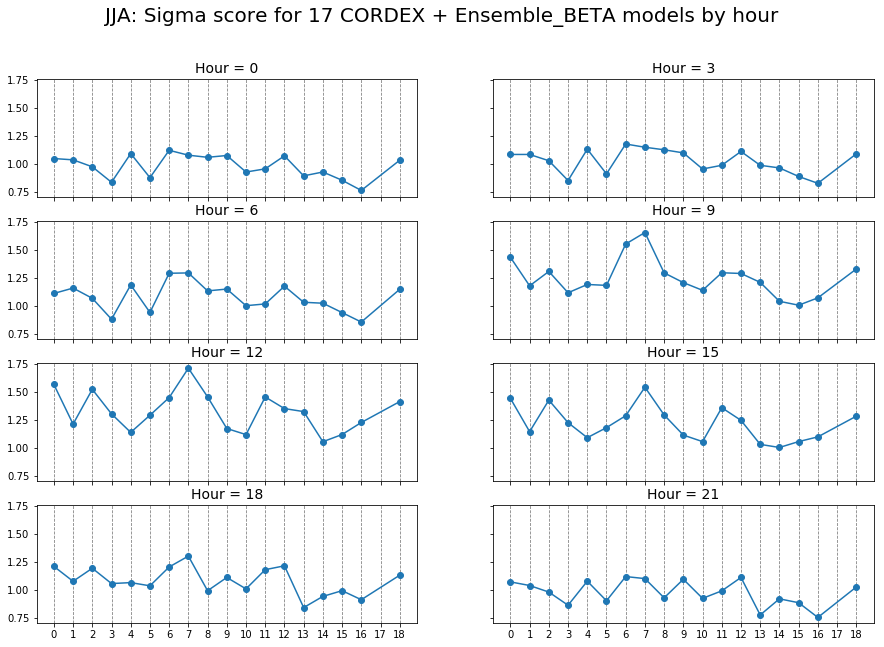

..\plots\output\metrics_ensembles


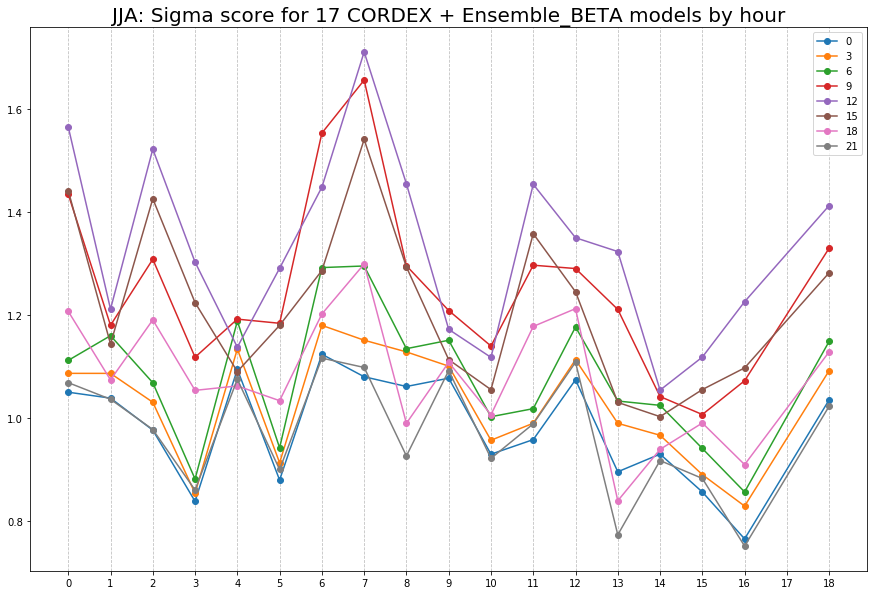

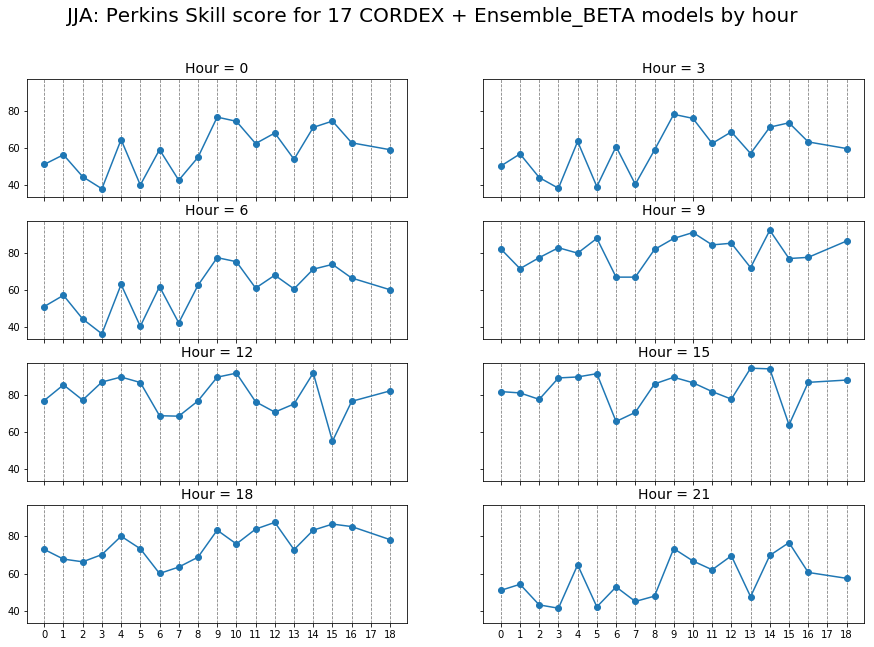

..\plots\output\metrics_ensembles


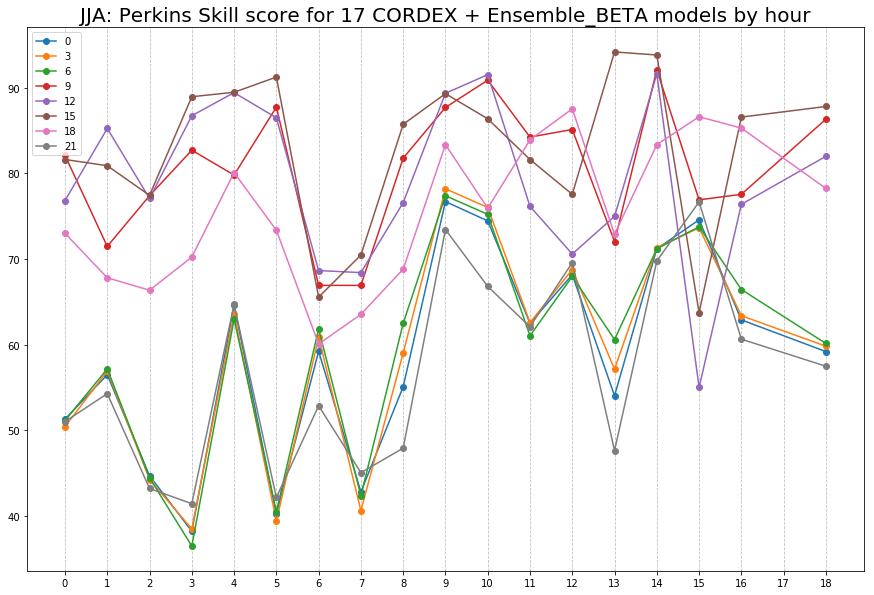

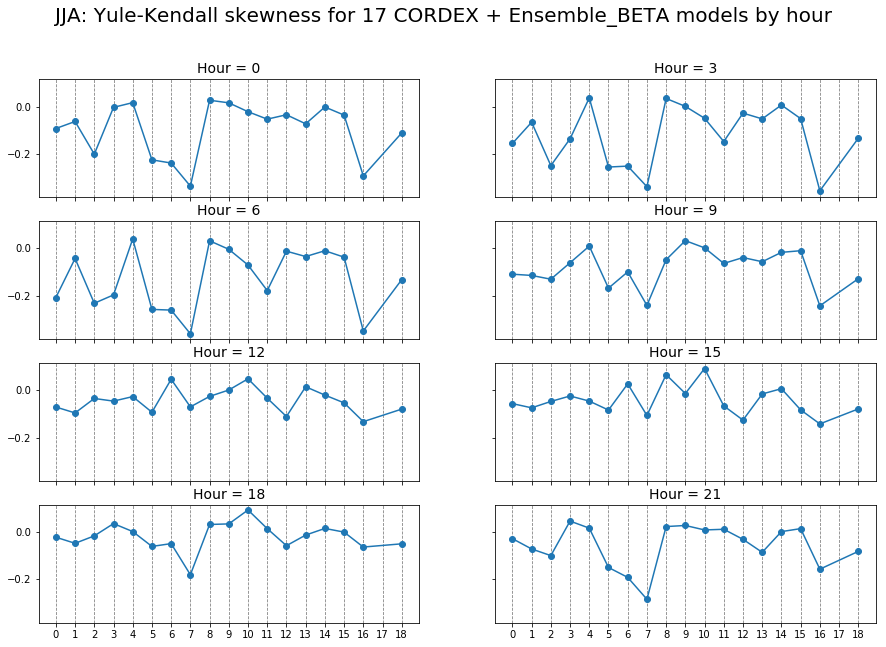

..\plots\output\metrics_ensembles


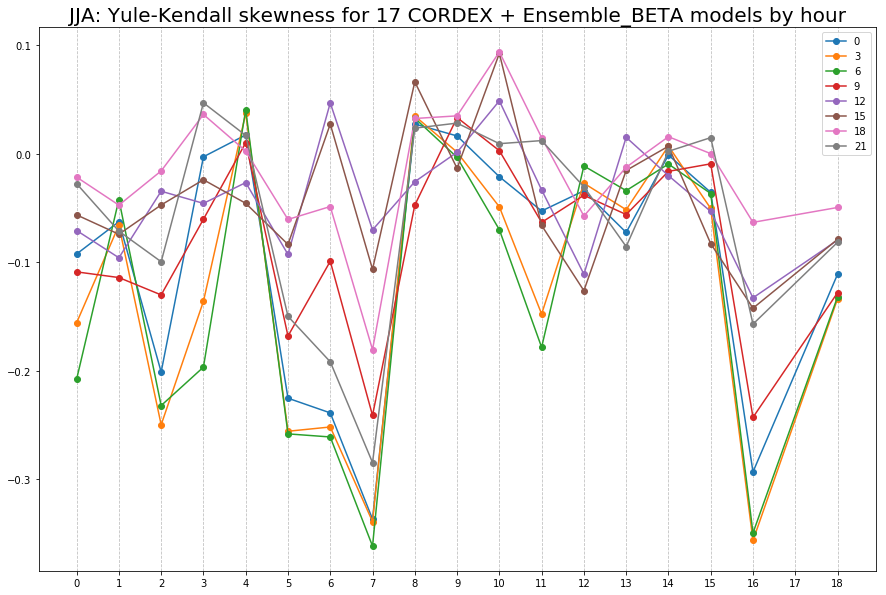

In [16]:
metrics_models_ensemblesBETA('cordex_join_obs_jja.csv', 'JJA', cordex_output_path, 'CORDEX',
                             models_cols, temp_obs_col, ens_beta_col,
                             plot=True, sub_folder='metrics_ensembles');

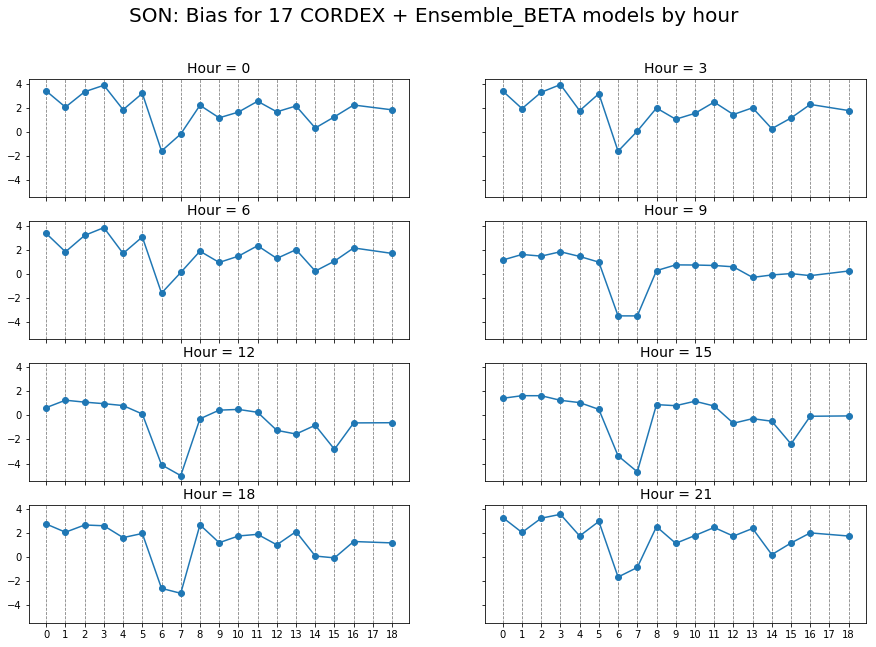

..\plots\output\metrics_ensembles


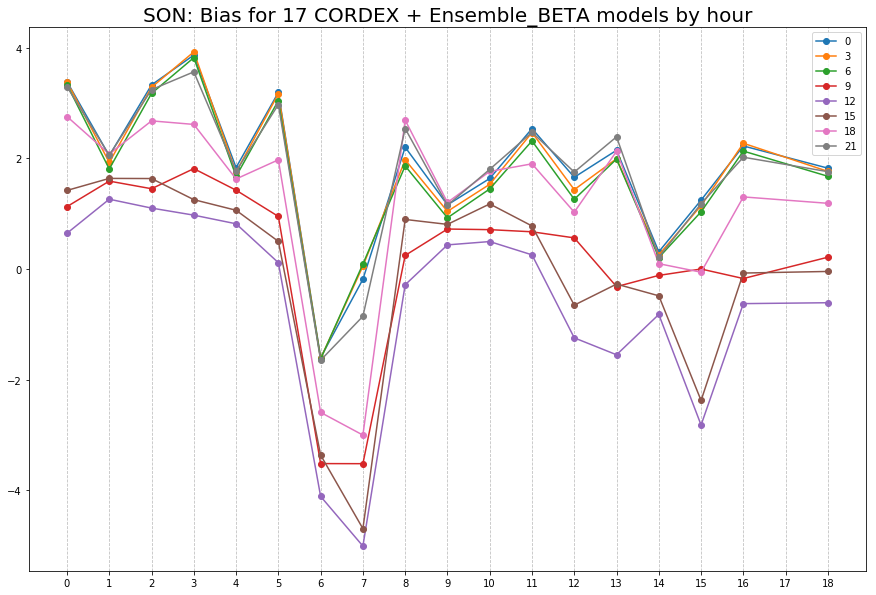

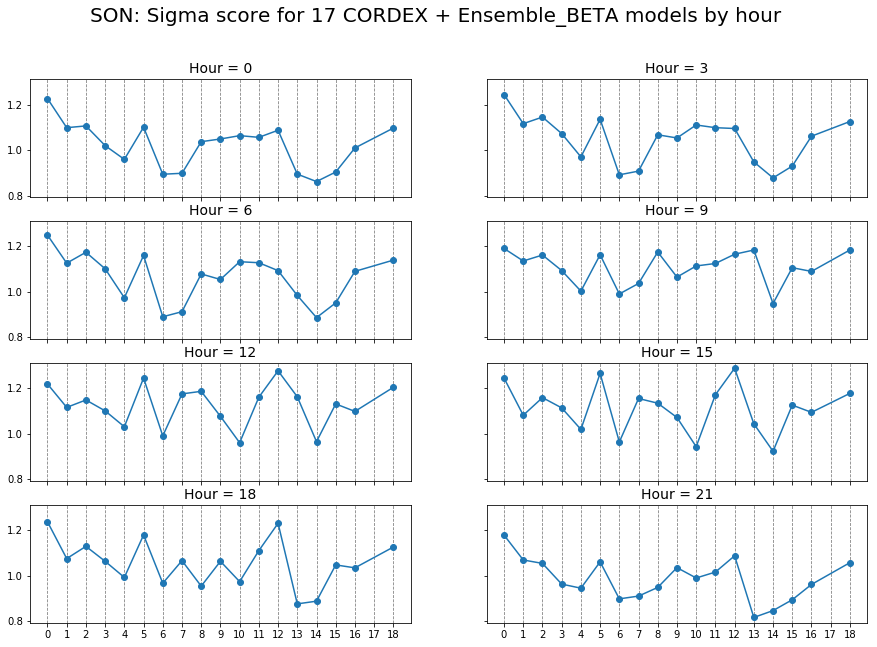

..\plots\output\metrics_ensembles


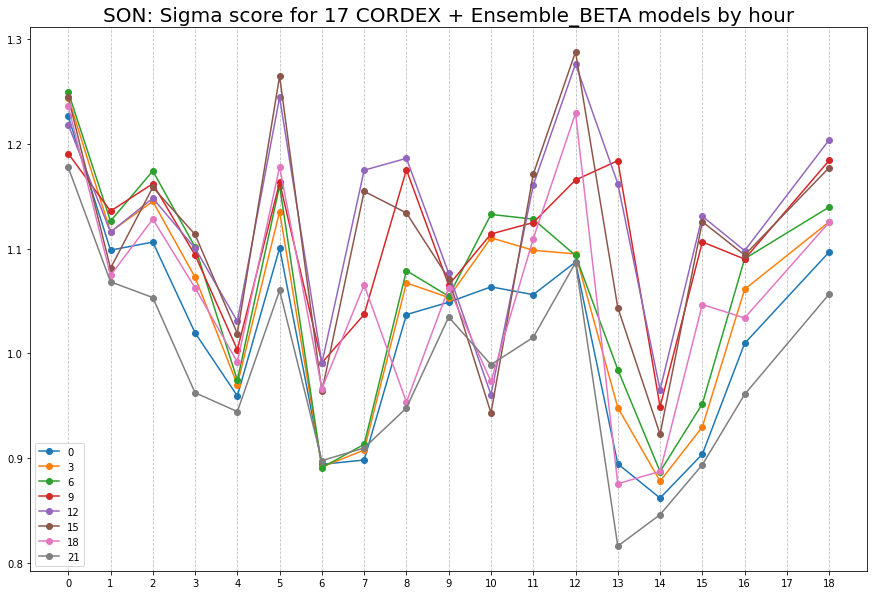

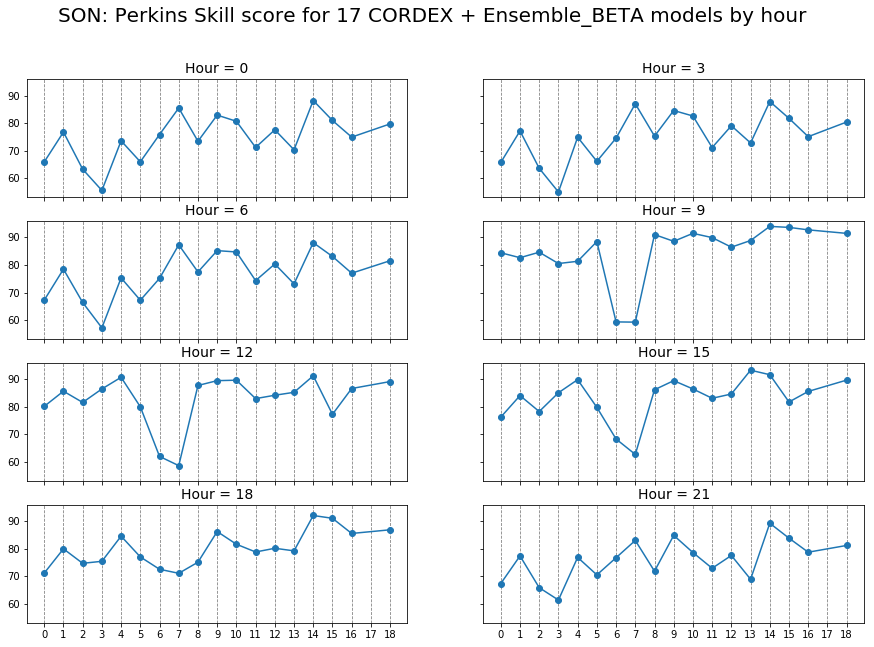

..\plots\output\metrics_ensembles


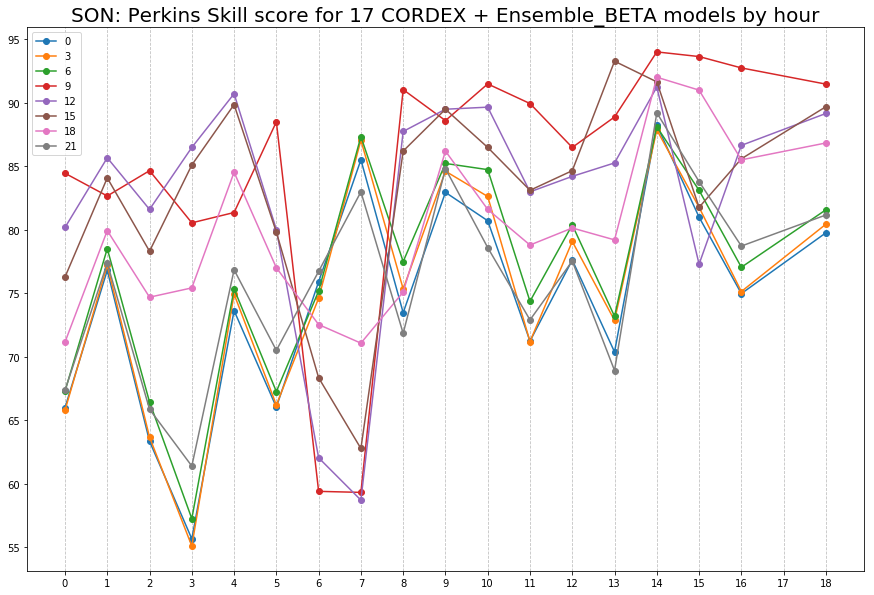

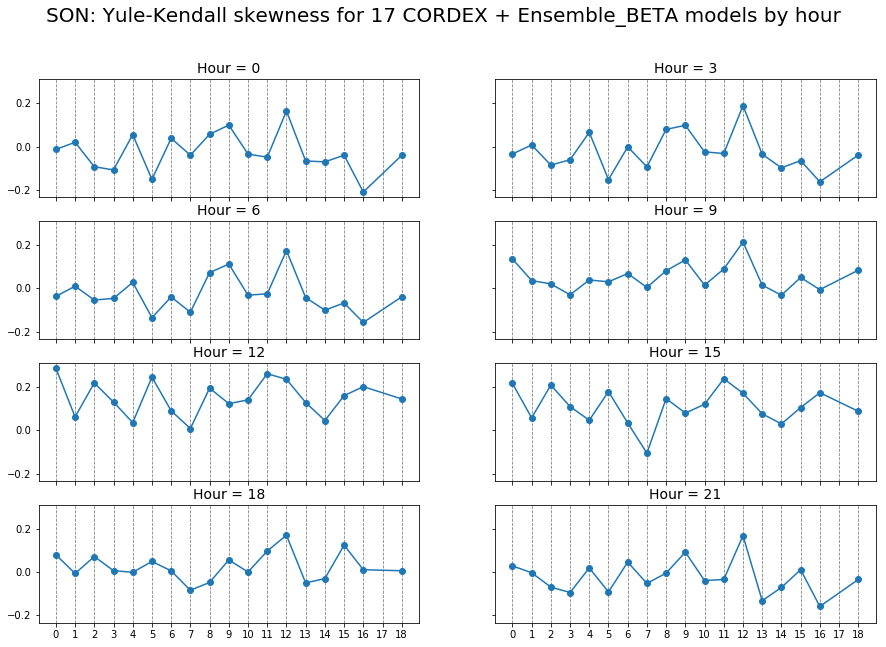

..\plots\output\metrics_ensembles


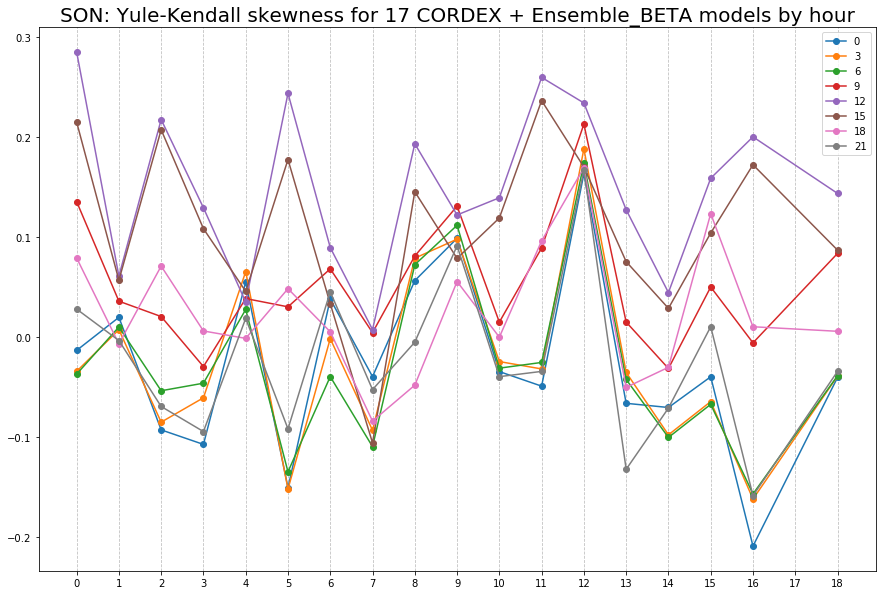

In [17]:
metrics_models_ensemblesBETA('cordex_join_obs_son.csv', 'SON', cordex_output_path, 'CORDEX',
                             models_cols, temp_obs_col, ens_beta_col,
                             plot=True, sub_folder='metrics_ensembles');